##Navsoft Case Studies

ANALYSIS OBJECTIVES
1. Exploratory Analysis
Objective: Analyze the data to uncover key trends, patterns, and relationships across stores, sales, and environmental factors. Highlight any anomalies or insights that could impact business decisions.
2. Store Analysis
Objective: Evaluate store performance and operational efficiency to identify factors driving revenue and profitability.
Key Focus Areas:
●	Category performance: Assess how different store classifications (Premium, Standard, Express) contribute to overall business performance.
●	Size-revenue relationship: Determine how store size influences revenue generation and operational outcomes.
●	Store efficiency: Compare stores on key performance metrics to rank and identify areas for improvement, creating actionable insights for stakeholders.
3. Revenue and Sales Forecasting
Objective: Develop actionable insights to predict future revenue and sales trends, enabling better planning and decision-making.
Key Questions:
●	How can future revenue for each store be estimated based on historical data and external factors?
●	How can sales performance for specific departments within stores be anticipated to optimize operations?
4. Store Segmentation
Objective: Identify meaningful groupings of stores based on their characteristics, performance, and other factors to enable tailored strategies for each group.


BUSINESS OBJECTIVE:

To optimize retail performance across 45 stores by leveraging data-driven insights for strategic decision-making. The goal is to enhance revenue generation, improve operational efficiency, and develop accurate forecasting capabilities to support business growth.

DATASET DESCRIPTION
1.	STORES  DATASET (stores.csv)
●	Contains information about 45 retail outlets
●	Columns:
○	Outlet_ID: Unique identifier for each retail location (1001-1045)
○	Category: Store classification (Premium, Standard, Express)
○	Square_Meters: Physical size of store in square meters

2.	FEATURES  DATASET (features.csv)
●	Contains weekly environmental and promotional data for each store
●	Total records: 8,190
●	Columns:
○	Outlet_ID: Store identifier
○	Week_Period: Date of data collection
○	Avg_Temp: Average temperature for the week
○	Gas_Cost_per_Liter: Fuel price
○	Promo1_Percent to Promo5_Percent: Different promotional discounts
○	Price_Index: Consumer Price Index
○	Jobless_Rate: Unemployment rate

3.	SALES  DATASET (sales.csv)
●	Contains weekly sales data per department for each store
●	Total records: 421,570
●	Columns:
○	Outlet_ID: Store identifier
○	Section_ID: Department identifier
○	Week_Period: Sales week date
○	Period_Revenue_K: Weekly sales in thousands
○	Special_Week: Holiday week indicator (True/False)


##Imorting the Libraries and Data and Merging

In [ ]:
#importing the basic library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Uploading the data
feature=pd.read_csv("/content/features.csv")
store=pd.read_csv("/content/stores.csv")
sales=pd.read_csv("/content/sales.csv")

In [ ]:
#Checking the first five row of the feature data
feature.head()

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
0,1001,05-02-2015,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73
1,1001,12-02-2015,3.6,0.67,0.0,0.0,0.0,0.0,0.0,232.37,9.73
2,1001,19-02-2015,4.4,0.66,0.0,0.0,0.0,0.0,0.0,232.42,9.73
3,1001,26-02-2015,8.1,0.68,0.0,0.0,0.0,0.0,0.0,232.45,9.73
4,1001,05-03-2015,8.1,0.69,0.0,0.0,0.0,0.0,0.0,232.49,9.73


In [ ]:
feature.describe()

,Outlet_ID,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
count,8190.000000,8190.000000,8190.000000,8190.00000,8190.000000,8190.000000,8190.000000,8.190000e+03,7605.000000,7605.000000
mean,1023.000000,15.197766,0.899659,5193.13606,1810.472481,1164.696289,2089.144667,3.065106e+03,189.706970,9.392217
std,12.987966,10.377532,0.113984,11083.37448,8243.334037,11309.930552,7060.667235,1.414683e+04,43.712213,2.252891
min,1001.000000,-21.800000,0.650000,-4172.17000,-398.640000,-268.890000,0.000000,-2.777600e+02,138.670000,4.420000
25%,1012.000000,7.700000,0.800000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,145.600000,7.960000
50%,1023.000000,16.000000,0.930000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,201.040000,9.370000
75%,1034.000000,23.300000,0.990000,6959.37500,147.885000,36.330000,1162.037500,4.020438e+03,235.330000,10.280000
max,1045.000000,38.900000,1.180000,154777.47000,156779.310000,224224.960000,101212.280000,1.157172e+06,251.870000,17.180000


In [ ]:
feature.shape

(8190, 11)

In [ ]:
feature['Week_Period'] = pd.to_datetime(feature['Week_Period'],format='%d-%m-%Y')

In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Outlet_ID           8190 non-null   int64         
 1   Week_Period         8190 non-null   datetime64[ns]
 2   Avg_Temp            8190 non-null   float64       
 3   Gas_Cost_per_Liter  8190 non-null   float64       
 4   Promo1_Percent      8190 non-null   float64       
 5   Promo2_Percent      8190 non-null   float64       
 6   Promo3_Percent      8190 non-null   float64       
 7   Promo4_Percent      8190 non-null   float64       
 8   Promo5_Percent      8190 non-null   float64       
 9   Price_Index         7605 non-null   float64       
 10  Jobless_Rate        7605 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 704.0 KB


In [ ]:
feature.head(2)

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
0,1001,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73
1,1001,2015-02-12,3.6,0.67,0.0,0.0,0.0,0.0,0.0,232.37,9.73


## Data Preprocessing
## Checking the null values and handling it annomaly detection as well

In [ ]:
feature.isnull().sum()

,0
Outlet_ID,0
Week_Period,0
Avg_Temp,0
Gas_Cost_per_Liter,0
Promo1_Percent,0
Promo2_Percent,0
Promo3_Percent,0
Promo4_Percent,0
Promo5_Percent,0
Price_Index,585


<Axes: ylabel='Price_Index'>

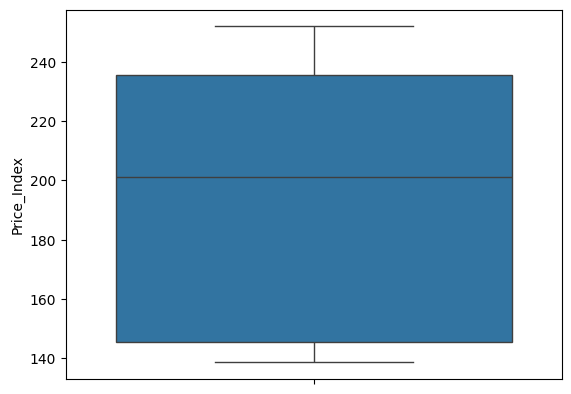

In [ ]:
import seaborn as sns
sns.boxplot(feature['Price_Index'])

In [ ]:
feature['Price_Index']=feature['Price_Index'].fillna(feature['Price_Index'].mean())

<Axes: ylabel='Jobless_Rate'>

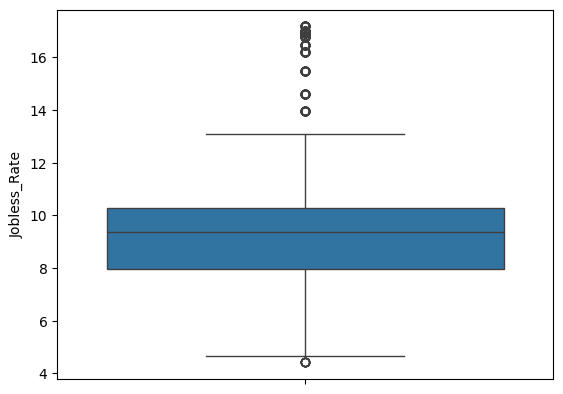

In [ ]:
import seaborn as sns
sns.boxplot(feature['Jobless_Rate'])

In [ ]:
feature['Jobless_Rate']=feature['Jobless_Rate'].fillna(feature['Jobless_Rate'].median())

In [ ]:
feature.isnull().sum().sum()

0

In [ ]:
feature.describe()

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
count,8190.000000,8190,8190.000000,8190.000000,8190.00000,8190.000000,8190.000000,8190.000000,8.190000e+03,8190.000000,8190.000000
mean,1023.000000,2016-10-30 18:51:25.714285824,15.197766,0.899659,5193.13606,1810.472481,1164.696289,2089.144667,3.065106e+03,189.706970,9.390630
min,1001.000000,2015-02-05 00:00:00,-21.800000,0.650000,-4172.17000,-398.640000,-268.890000,0.000000,-2.777600e+02,138.670000,4.420000
25%,1012.000000,2015-12-17 00:00:00,7.700000,0.800000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,145.920000,8.200000
50%,1023.000000,2016-10-31 12:00:00,16.000000,0.930000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,189.706970,9.370000
75%,1034.000000,2017-09-14 00:00:00,23.300000,0.990000,6959.37500,147.885000,36.330000,1162.037500,4.020438e+03,234.045000,10.227500
max,1045.000000,2018-07-26 00:00:00,38.900000,1.180000,154777.47000,156779.310000,224224.960000,101212.280000,1.157172e+06,251.870000,17.180000
std,12.987966,NaN,10.377532,0.113984,11083.37448,8243.334037,11309.930552,7060.667235,1.414683e+04,42.121945,2.170938


"I am seeing this minus sign in my Discount is having negative percentage and Avg_temp also is -21"

In [ ]:
promo_cols = ['Promo1_Percent', 'Promo2_Percent', 'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent']

In [ ]:
# Replacing negative values in promotion columns with 0
feature[promo_cols] = feature[promo_cols].clip(lower=0)

In [ ]:
feature.describe()

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
count,8190.000000,8190,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8.190000e+03,8190.000000,8190.000000
mean,1023.000000,2016-10-30 18:51:25.714285824,15.197766,0.899659,5193.893293,1810.588558,1164.770272,2089.144667,3.065146e+03,189.706970,9.390630
min,1001.000000,2015-02-05 00:00:00,-21.800000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,138.670000,4.420000
25%,1012.000000,2015-12-17 00:00:00,7.700000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,145.920000,8.200000
50%,1023.000000,2016-10-31 12:00:00,16.000000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,189.706970,9.370000
75%,1034.000000,2017-09-14 00:00:00,23.300000,0.990000,6959.375000,147.885000,36.330000,1162.037500,4.020438e+03,234.045000,10.227500
max,1045.000000,2018-07-26 00:00:00,38.900000,1.180000,154777.470000,156779.310000,224224.960000,101212.280000,1.157172e+06,251.870000,17.180000
std,12.987966,NaN,10.377532,0.113984,11082.912368,8243.306702,11309.922398,7060.667235,1.414683e+04,42.121945,2.170938


In [ ]:
feature['Promo5_Percent'].value_counts()

,count
Promo5_Percent,
0.00,4142
1596.84,2
1991.96,2
4114.77,2
1479.34,2
...,...
4945.44,1
2849.24,1
7114.11,1


"Here in Promo Percentage has annomaly,As when I have taken PromoPercentage,I have found out the percentage value greater than 100,
which can impact the business decision"

In [ ]:
#Checking the first five row of the store data
store.head()

,Outlet_ID,Category,Square_Meters
0,1001,Premium,14058.0
1,1002,Premium,18795.0
2,1003,Standard,3474.0
3,1004,Premium,19125.0
4,1005,Standard,3240.0


In [ ]:
store.shape

(45, 3)

In [ ]:
store.isnull().sum().sum()

0

In [ ]:
#Checking the first five row of the sales data
sales.head()

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week
0,1001,10,05-02-2015,28.66,False
1,1001,10,12-02-2015,52.95,True
2,1001,10,19-02-2015,47.83,False
3,1001,10,26-02-2015,22.31,False
4,1001,10,05-03-2015,25.10,False


In [ ]:
sales.shape

(421570, 5)

In [ ]:
sales['Week_Period'] = pd.to_datetime(sales['Week_Period'],format='%d-%m-%Y')

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Outlet_ID         421570 non-null  int64         
 1   Section_ID        421570 non-null  int64         
 2   Week_Period       421570 non-null  datetime64[ns]
 3   Period_Revenue_K  421570 non-null  float64       
 4   Special_Week      421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
sales.describe()

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K
count,421570.000000,421570.000000,421570,421570.000000
mean,1022.200546,442.603174,2016-06-17 17:15:55.656237312,18.378428
min,1001.000000,10.000000,2015-02-05 00:00:00,-5.740000
25%,1011.000000,180.000000,2015-10-08 00:00:00,2.390000
50%,1022.000000,370.000000,2016-06-17 00:00:00,8.750000
75%,1033.000000,740.000000,2017-02-24 00:00:00,23.240000
max,1045.000000,990.000000,2017-10-26 00:00:00,797.060000
std,12.785297,304.920540,NaN,26.117873


In [ ]:
sales.head(2)

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week
0,1001,10,2015-02-05,28.66,False
1,1001,10,2015-02-12,52.95,True


In [ ]:
sales.isnull().sum().sum()

0

In [ ]:
#Joining all the data to create master table on the basis of Outlet id and week_date
# Inner Join
data = pd.merge(store,feature,on='Outlet_ID', how='inner')
data.head()

,Outlet_ID,Category,Square_Meters,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
0,1001,Premium,14058.0,2015-02-05,5.7,0.68,0.0,0.0,0.0,0.0,0.0,232.21,9.73
1,1001,Premium,14058.0,2015-02-12,3.6,0.67,0.0,0.0,0.0,0.0,0.0,232.37,9.73
2,1001,Premium,14058.0,2015-02-19,4.4,0.66,0.0,0.0,0.0,0.0,0.0,232.42,9.73
3,1001,Premium,14058.0,2015-02-26,8.1,0.68,0.0,0.0,0.0,0.0,0.0,232.45,9.73
4,1001,Premium,14058.0,2015-03-05,8.1,0.69,0.0,0.0,0.0,0.0,0.0,232.49,9.73


In [ ]:
data.columns

Index(['Outlet_ID', 'Category', 'Square_Meters', 'Week_Period', 'Avg_Temp',
       'Gas_Cost_per_Liter', 'Promo1_Percent', 'Promo2_Percent',
       'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent', 'Price_Index',
       'Jobless_Rate'],
      dtype='object')

In [ ]:
data.shape

(8190, 13)

In [ ]:
data = pd.merge(sales, data, on=['Outlet_ID', 'Week_Period'], how='inner')
data

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week,Category,Square_Meters,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
0,1001,10,2015-02-05,28.66,False,Premium,14058.0,5.7,0.68,0.00,0.00,0.00,0.00,0.00,232.21,9.73
1,1001,10,2015-02-12,52.95,True,Premium,14058.0,3.6,0.67,0.00,0.00,0.00,0.00,0.00,232.37,9.73
2,1001,10,2015-02-19,47.83,False,Premium,14058.0,4.4,0.66,0.00,0.00,0.00,0.00,0.00,232.42,9.73
3,1001,10,2015-02-26,22.31,False,Premium,14058.0,8.1,0.68,0.00,0.00,0.00,0.00,0.00,232.45,9.73
4,1001,10,2015-03-05,25.10,False,Premium,14058.0,8.1,0.69,0.00,0.00,0.00,0.00,0.00,232.49,9.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1045,980,2017-09-28,0.58,False,Standard,10983.0,18.3,1.06,6834.91,30.96,2.25,2401.52,4932.38,211.21,10.42
421566,1045,980,2017-10-05,0.72,False,Standard,10983.0,18.3,1.05,7570.11,0.00,28.23,3380.14,3510.02,211.39,10.40
421567,1045,980,2017-10-12,1.22,False,Standard,10983.0,12.5,1.06,2934.42,0.00,11.84,898.98,5985.81,211.56,10.40
421568,1045,980,2017-10-19,0.87,False,Standard,10983.0,13.6,1.05,3006.03,0.00,4.77,656.60,2306.24,211.56,10.40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Outlet_ID           421570 non-null  int64         
 1   Section_ID          421570 non-null  int64         
 2   Week_Period         421570 non-null  datetime64[ns]
 3   Period_Revenue_K    421570 non-null  float64       
 4   Special_Week        421570 non-null  bool          
 5   Category            421570 non-null  object        
 6   Square_Meters       421570 non-null  float64       
 7   Avg_Temp            421570 non-null  float64       
 8   Gas_Cost_per_Liter  421570 non-null  float64       
 9   Promo1_Percent      421570 non-null  float64       
 10  Promo2_Percent      421570 non-null  float64       
 11  Promo3_Percent      421570 non-null  float64       
 12  Promo4_Percent      421570 non-null  float64       
 13  Promo5_Percent      421570 no

In [ ]:
data.shape

(421570, 16)

In [ ]:
data.describe()

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Square_Meters,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,1022.200546,442.603174,2016-06-17 17:15:55.656237312,18.378428,12702.363245,15.605277,0.887789,3885.112198,1320.105382,702.139351,1624.698439,2494.158559,188.322189,9.552442
min,1001.000000,10.000000,2015-02-05 00:00:00,-5.740000,3240.000000,-18.900000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000,138.670000,4.650000
25%,1011.000000,180.000000,2015-10-08 00:00:00,2.390000,8699.000000,8.200000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,145.220000,8.270000
50%,1022.000000,370.000000,2016-06-17 00:00:00,8.750000,13022.000000,16.700000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,200.550000,9.440000
75%,1033.000000,740.000000,2017-02-24 00:00:00,23.240000,18813.000000,23.500000,0.990000,4213.580000,3.300000,6.810000,637.940000,3252.060000,233.660000,10.290000
max,1045.000000,990.000000,2017-10-26 00:00:00,797.060000,20404.000000,37.900000,1.180000,132970.140000,156779.310000,212445.910000,101212.280000,162778.920000,249.960000,17.180000
std,12.785297,304.920540,NaN,26.117873,5665.249574,10.249250,0.121214,9078.578879,7626.780548,8293.309428,5841.794931,6311.443910,43.075209,2.236139


## 1)Exploratory Data Analysis (EDA)

Which Stores is making more money?

In [ ]:
data.columns

Index(['Outlet_ID', 'Section_ID', 'Week_Period', 'Period_Revenue_K',
       'Special_Week', 'Category', 'Square_Meters', 'Avg_Temp',
       'Gas_Cost_per_Liter', 'Promo1_Percent', 'Promo2_Percent',
       'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent', 'Price_Index',
       'Jobless_Rate'],
      dtype='object')

In [ ]:
# I am looking which store is making more money
# Group by 'Outlet_ID' and calculate the sum of 'Period_Revenue_K'
grouped_data = data.groupby('Outlet_ID')['Period_Revenue_K'].sum()

# Sort the results in descending order
sorted_data = grouped_data.sort_values(ascending=False)

print(sorted_data.iloc[[0]])

Outlet_ID
1020    346607.7
Name: Period_Revenue_K, dtype: float64


As we can see above Outlet 1020 is making more sales

How do promotions  (Promo1 to Promo5) affect sales?

we will choosing correlation option over here

<Axes: >

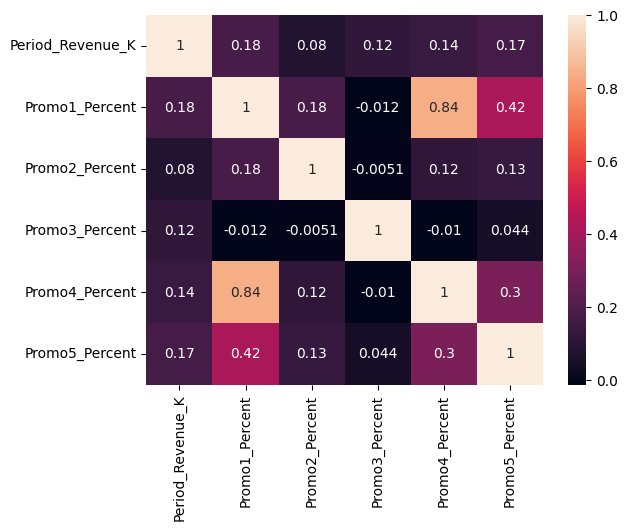

In [ ]:
# Step 1: Aggregate sales data to get total sales per store per week
sales_promo_df = data.groupby(['Outlet_ID', 'Week_Period']).agg({
    'Period_Revenue_K': 'sum',
    'Promo1_Percent': 'mean',
    'Promo2_Percent': 'mean',
    'Promo3_Percent': 'mean',
    'Promo4_Percent': 'mean',
    'Promo5_Percent': 'mean'
}).reset_index()

# Step 2: Check correlations between promotions and sales
correlations = sales_promo_df[['Period_Revenue_K','Promo1_Percent','Promo2_Percent','Promo3_Percent','Promo4_Percent','Promo5_Percent']].corr()

sns.heatmap(correlations,annot=True)

Here Promotional  1% is having more impact on sales

<Axes: >

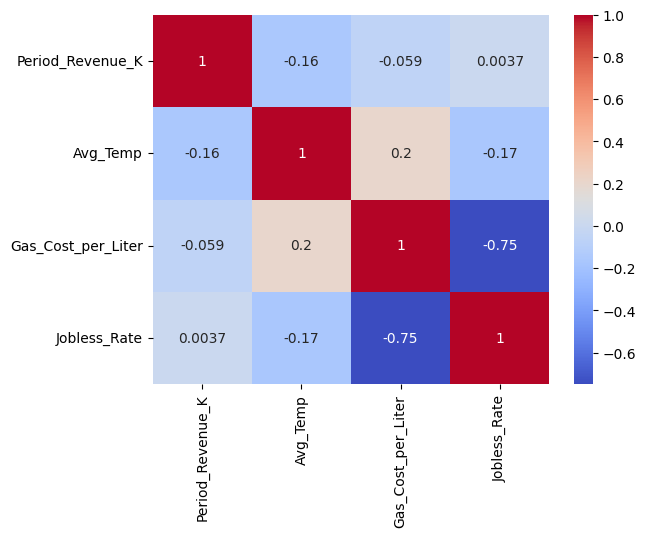

In [ ]:
# Step 1: Aggregate sales data to get total sales per store per week
sales_env_df = data.groupby(['Week_Period']).agg({
    'Period_Revenue_K': 'sum',
    'Avg_Temp': 'mean',
    'Gas_Cost_per_Liter': 'mean',
    'Jobless_Rate': 'mean'
}).reset_index()


# Step 2: Correlation analysis
correlations = sales_env_df[['Period_Revenue_K', 'Avg_Temp', 'Gas_Cost_per_Liter', 'Jobless_Rate']].corr()


# Step 3: Visualize correlations using heatmap
sns.heatmap(correlations, annot=True, cmap="coolwarm")


Gas_Cost_per_Liter:
A negative correlation would suggest that higher fuel prices reduce sales, likely due to reduced customer visits or higher costs for store operations.



## 2)Graphical Analysis

1)Bar charts to compare store types (Premium, Standard, Express).

2)Use scatter plots to see if bigger stores earn more revenue.

3)Create heatmaps to check relationships between variables (like sales and
  temperature).

In [ ]:
data['Category'].value_counts()

,count
Category,
Premium,215478
Standard,163495
Express,42597


1)Bar charts to compare store types (Premium, Standard, Express).

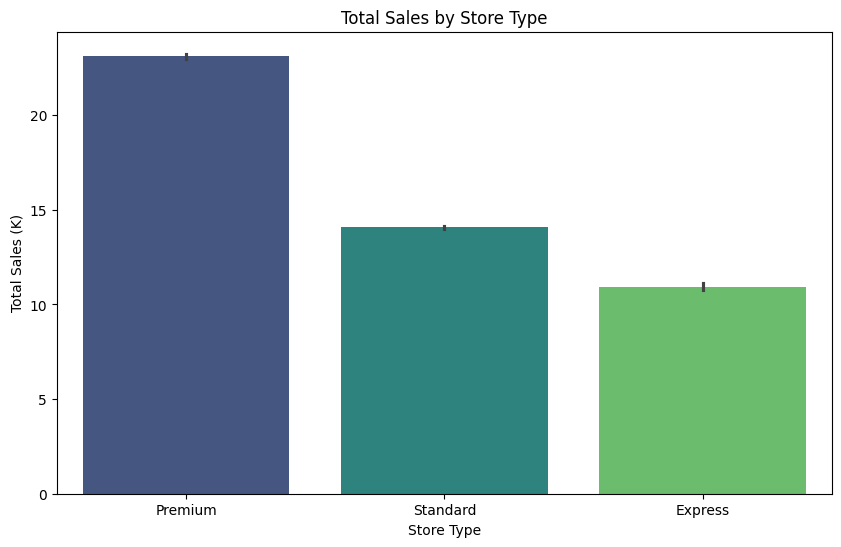

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Category', y='Period_Revenue_K', palette='viridis')
plt.title("Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales (K)")
plt.show()

2)Use scatter plots to see if bigger stores earn more revenue.

<Axes: xlabel='Square_Meters', ylabel='Period_Revenue_K'>

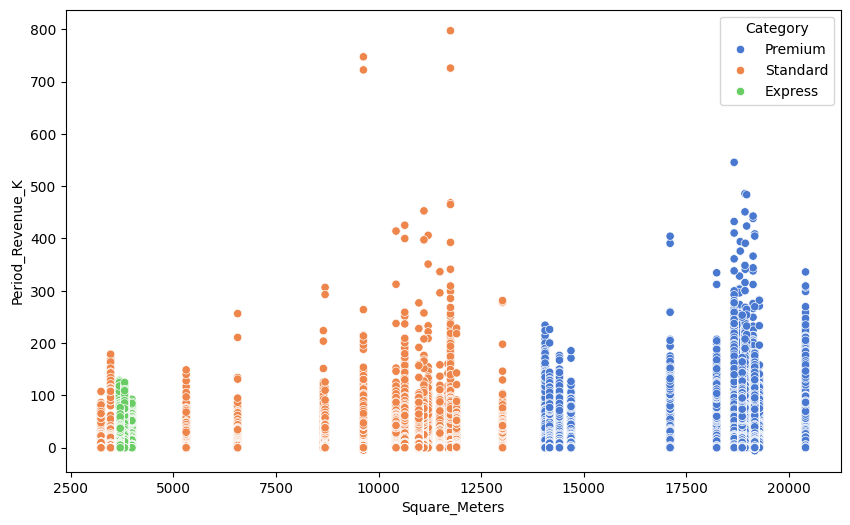

In [ ]:
#How does the store outlet size matter for the revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Square_Meters', y='Period_Revenue_K', hue='Category', palette='muted')

## 3)Analyze:
## Store Performance (Which Stores Are Better?)
## What to do? Compare stores to see which are performing well and which are not.

By Category:
Compare Premium, Standard, and Express stores on revenue, efficiency, and size.


Category-Wise Performance:
   Category  Total_Revenue_K  Revenue_per_Square_Meter  Square_Meters
0   Express        466328.68                 20.636704    3766.500000
1   Premium       4980663.37                 13.696723   16466.772727
2  Standard       2300801.92                 14.776326    9400.823529


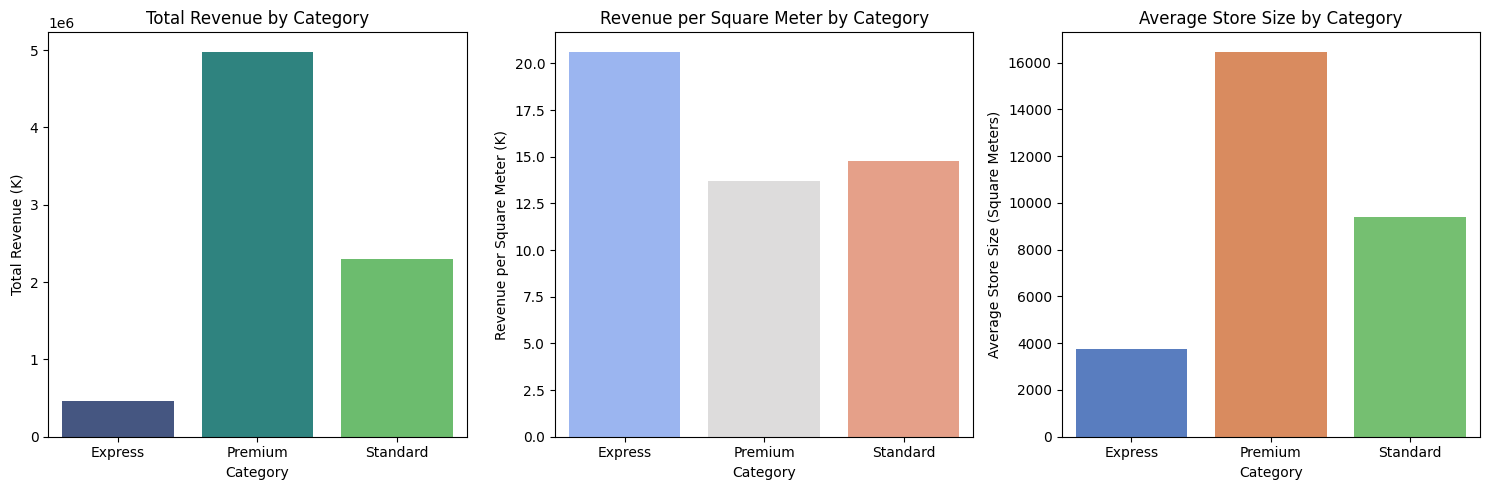

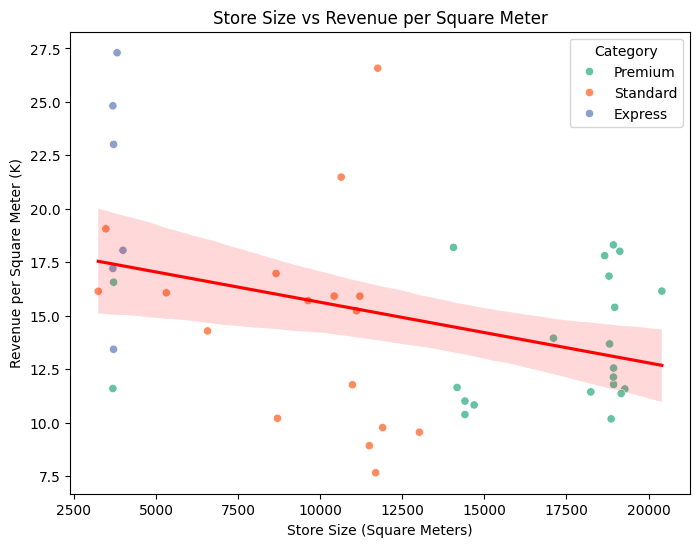

Top 10 Stores by Revenue and Efficiency:
    Outlet_ID  Total_Revenue_K  Square_Meters  Revenue_per_Square_Meter
19       1020        346607.70        18928.0                 18.311903
3        1004        344475.59        19125.0                 18.011796
13       1014        332349.88        18664.0                 17.807002
12       1013        329495.13        20404.0                 16.148556
1        1002        316689.52        18795.0                 16.849669
9        1010        312360.42        11753.0                 26.577080
26       1027        291934.03        18969.0                 15.390059
5        1006        257319.75        18813.0                 13.677763
0        1001        255763.30        14058.0                 18.193434
38       1039        238562.61        17104.0                 13.947767


In [ ]:
# Load datasets
sales_df = pd.read_csv("/content/sales.csv")
stores_df = pd.read_csv("/content/stores.csv")

# Step 1: Aggregate Total Revenue for each store
total_revenue = sales_df.groupby('Outlet_ID').agg({'Period_Revenue_K': 'sum'}).reset_index()
total_revenue.rename(columns={'Period_Revenue_K': 'Total_Revenue_K'}, inplace=True)

# Step 2: Merge total revenue with store details
store_performance_df = total_revenue.merge(stores_df, on='Outlet_ID', how='left')

# Step 3: Calculate Revenue Efficiency (Revenue per Square Meter)  Efficiency=Total_Revenue_K/Square_Meters
store_performance_df['Revenue_per_Square_Meter'] = store_performance_df['Total_Revenue_K'] / store_performance_df['Square_Meters']

# Step 4: Compare by Category
category_metrics = store_performance_df.groupby('Category').agg({
    'Total_Revenue_K': 'sum',
    'Revenue_per_Square_Meter': 'mean',
    'Square_Meters': 'mean'
}).reset_index()

# Display results
print("Category-Wise Performance:")
print(category_metrics)

# Step 5: Plot Comparisons by Category
plt.figure(figsize=(15, 5))

# Total Revenue by Category
plt.subplot(1, 3, 1)
sns.barplot(data=category_metrics, x='Category', y='Total_Revenue_K', palette='viridis')
plt.title("Total Revenue by Category")
plt.ylabel("Total Revenue (K)")

# Efficiency by Category
plt.subplot(1, 3, 2)
sns.barplot(data=category_metrics, x='Category', y='Revenue_per_Square_Meter', palette='coolwarm')
plt.title("Revenue per Square Meter by Category")
plt.ylabel("Revenue per Square Meter (K)")

# Average Store Size by Category
plt.subplot(1, 3, 3)
sns.barplot(data=category_metrics, x='Category', y='Square_Meters', palette='muted')
plt.title("Average Store Size by Category")
plt.ylabel("Average Store Size (Square Meters)")

plt.tight_layout()
plt.show()

# Step 6: Analyze Size Efficiency (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=store_performance_df, x='Square_Meters', y='Revenue_per_Square_Meter', hue='Category', palette='Set2')
sns.regplot(data=store_performance_df, x='Square_Meters', y='Revenue_per_Square_Meter', scatter=False, color='red')
plt.title("Store Size vs Revenue per Square Meter")
plt.xlabel("Store Size (Square Meters)")
plt.ylabel("Revenue per Square Meter (K)")
plt.show()

# Step 7: Rank Stores by Revenue and Efficiency
store_ranking = store_performance_df.sort_values(by=['Total_Revenue_K', 'Revenue_per_Square_Meter'], ascending=False)

# Display Top 10 Stores
print("Top 10 Stores by Revenue and Efficiency:")
print(store_ranking[['Outlet_ID', 'Total_Revenue_K', 'Square_Meters', 'Revenue_per_Square_Meter']].head(10))


## 4) Forecast Sales and Revenue (Predict the Future)

What to do? Use past sales data to predict what sales might look like in the future.
How?
Look at the historical sales data over weeks to find trends.

Use predictive models (like ARIMA) to forecast future sales.

Include external factors (e.g., promotions, temperature, or gas prices) in the models to make predictions better.

Predict both:

1)Total sales for each store.

2)Department-wise sales trends.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
sales.head(2)

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week
0,1001,10,2015-02-05,28.66,False
1,1001,10,2015-02-12,52.95,True


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Outlet_ID         421570 non-null  int64         
 1   Section_ID        421570 non-null  int64         
 2   Week_Period       421570 non-null  datetime64[ns]
 3   Period_Revenue_K  421570 non-null  float64       
 4   Special_Week      421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
# Filter data for a single store and department for simplicity (e.g.Store 1001, Department 1)
store_id = 1001
filtered_data = sales[(sales['Outlet_ID'] == store_id)]

# Group data by week and sum up revenue for that department and store
time_series = filtered_data.groupby('Week_Period')['Period_Revenue_K'].sum()

# Sort by date to ensure time-series order
time_series = time_series.sort_index()

# Display the first few rows of the time-series
time_series.head()

,Period_Revenue_K
Week_Period,
2015-02-05,1890.26
2015-02-12,1888.25
2015-02-19,1853.73
2015-02-26,1621.24
2015-03-05,1788.03


In [ ]:
time_series.tail()

,Period_Revenue_K
Week_Period,
2017-09-28,1652.61
2017-10-05,1921.42
2017-10-12,1809.05
2017-10-19,1734.28
2017-10-26,1717.74


In [ ]:
type(time_series)
len(time_series)

143

In [ ]:
X=time_series[0:120]

In [ ]:
Y=time_series[120:]

In [ ]:
# Checking the stationarity in the dataset
from statsmodels.tsa.stattools import adfuller

# Assume `time_series` is your time-series data (e.g., weekly revenue for a store)
result = adfuller(X)

# Extract results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print results
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Check stationarity
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis).")
else:
    print("The time series is not stationary (fail to reject null hypothesis).")

ADF Statistic: -4.76648796655187
P-value: 6.30089864715646e-05
Critical Values:
   1%: -3.4885349695076844
   5%: -2.887019521656941
   10%: -2.5803597920604915
The time series is stationary (reject null hypothesis).


we can see that our time series is Stationary

checking the optimum lag for our time series

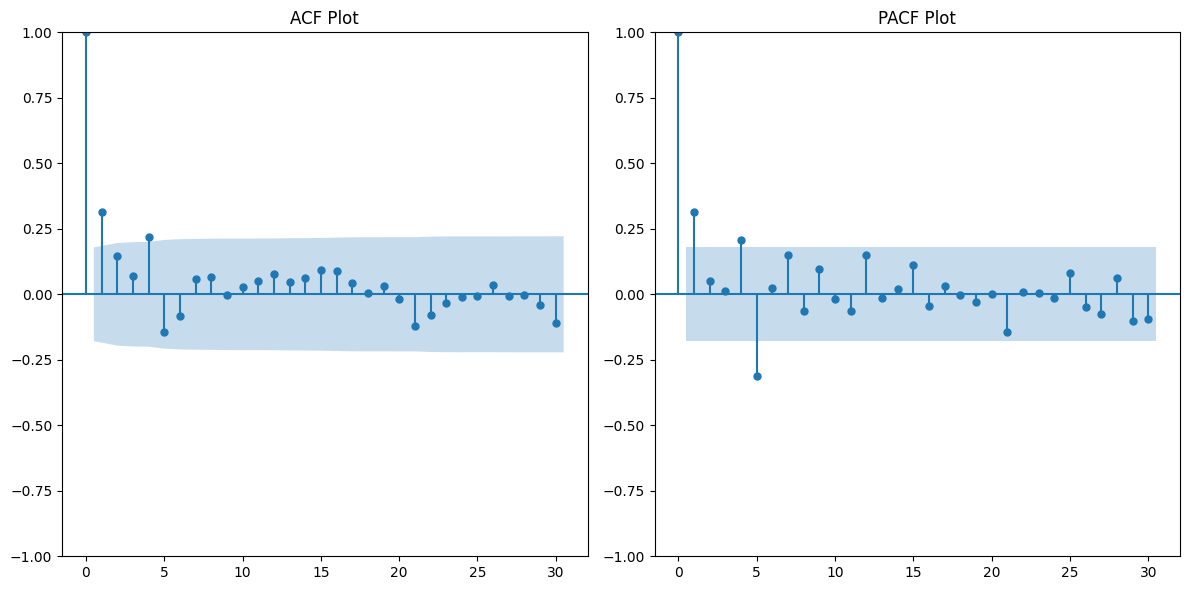

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(X, ax=plt.gca(), lags=30)
plt.title("ACF Plot")

# PACF Plot
plt.subplot(122)
plot_pacf(X, ax=plt.gca(), lags=30)
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


here lag for ACF is 2 and PACF is 2

In [ ]:
# Using identified parameters
model = ARIMA(X, order=(2, 1, 2))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Make sure forecast and Y have the same length and frequency
forecast = result.forecast(steps=len(Y))  # Adjust 'steps' to match len(Y)
# Make sure the indices match
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
120,1825.032767
121,1844.720228
122,1831.008461
123,1844.536168
124,1833.002273
125,1843.419057
126,1834.228088
127,1842.413695
128,1835.150882
129,1841.604695


In [ ]:
forecast.values

array([1825.03276727, 1844.7202285 , 1831.00846148, 1844.53616811,
       1833.00227257, 1843.41905717, 1834.22808797, 1842.4136951 ,
       1835.15088155, 1841.60469459, 1835.8732594 , 1840.96441947,
       1836.44245297, 1840.45902105, 1836.89142228, 1840.06025754,
       1837.2456218 , 1839.7456516 , 1837.52506358, 1839.49744485,
       1837.74552708, 1839.30162377, 1837.91946022])

In [ ]:
X

,Period_Revenue_K
Week_Period,
2015-02-05,1890.26
2015-02-12,1888.25
2015-02-19,1853.73
2015-02-26,1621.24
2015-03-05,1788.03
...,...
2017-04-20,1749.82
2017-04-27,1689.31
2017-05-04,1937.20


In [ ]:
# Assuming Y is your test set and you want to forecast 23 periods into the future
from sklearn.metrics import root_mean_squared_error
# Calculate MSE
rmse = root_mean_squared_error(Y, forecast)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 100.65432453794241


In [ ]:
sales.head(2)

,Outlet_ID,Section_ID,Week_Period,Period_Revenue_K,Special_Week
0,1001,10,2015-02-05,28.66,False
1,1001,10,2015-02-12,52.95,True


In [ ]:
# Filter data for a single store and department for simplicity (e.g.Store 1001, Department 1)
Section_ID = 10
filtered_data = sales[(sales['Section_ID'] == Section_ID)]

# Group data by week and sum up revenue for that department and store
time_series = filtered_data.groupby('Week_Period')['Period_Revenue_K'].sum()

# Sort by date to ensure time-series order
time_series = time_series.sort_index()

# Display the first few rows of the time-series
time_series.head()

,Period_Revenue_K
Week_Period,
2015-02-05,1014.11
2015-02-12,1675.74
2015-02-19,1285.98
2015-02-26,783.57
2015-03-05,877.09


In [ ]:
X=time_series[0:113]

In [ ]:
Y=time_series[113:]

In [ ]:
# Checking the stationarity in the dataset
from statsmodels.tsa.stattools import adfuller

# Assume `time_series` is your time-series data (e.g., weekly revenue for a store)
result = adfuller(X)

# Extract results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print results
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Check stationarity
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis).")
else:
    print("The time series is not stationary (fail to reject null hypothesis).")

ADF Statistic: -6.849031518289169
P-value: 1.713086723008164e-09
Critical Values:
   1%: -3.490683082754047
   5%: -2.8879516565798817
   10%: -2.5808574442009578
The time series is stationary (reject null hypothesis).


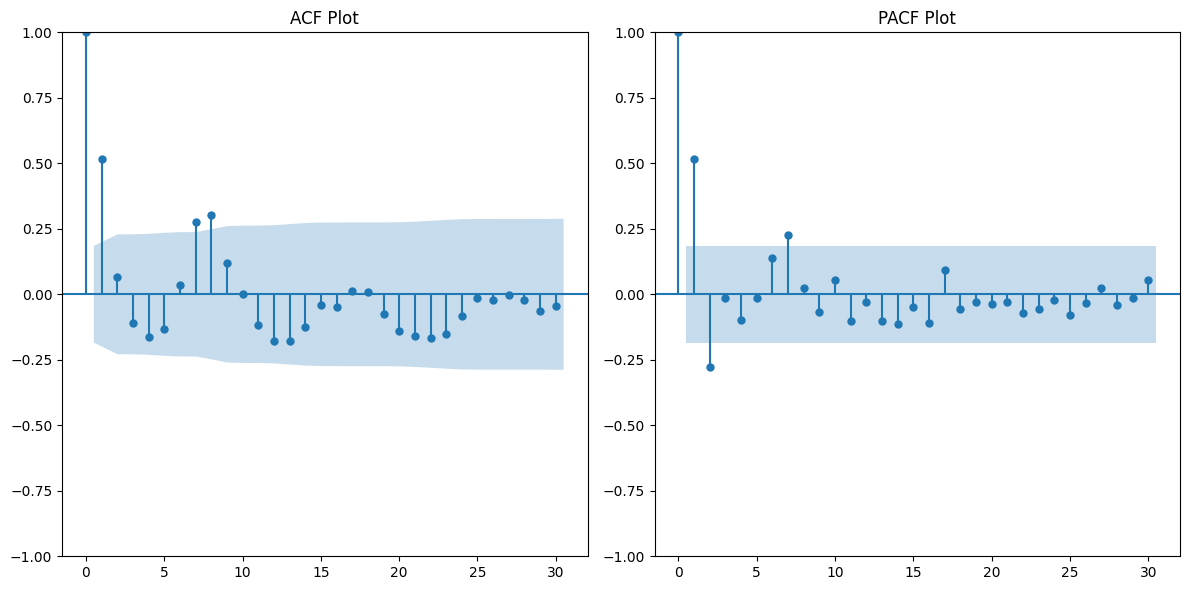

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(X, ax=plt.gca(), lags=30)
plt.title("ACF Plot")

# PACF Plot
plt.subplot(122)
plot_pacf(X, ax=plt.gca(), lags=30)
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


In [ ]:
# Using identified parameters
model = ARIMA(X, order=(2, 1, 2))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Make sure forecast and Y have the same length and frequency
forecast = result.forecast(steps=len(Y))  # Adjust 'steps' to match len(Y)
# Make sure the indices match
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
113,1228.557783
114,1064.705339
115,986.384717
116,979.528705
117,997.103219
118,1011.034118
119,1015.540384
120,1014.655510
121,1012.772016
122,1011.739124


In [ ]:
# Assuming Y is your test set and you want to forecast 23 periods into the future
from sklearn.metrics import root_mean_squared_error
# Calculate MSE
rmse = root_mean_squared_error(Y, forecast.values)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 405.8040010851203


## 5)Segmentation


Identify meaningful groupings of stores based on their characteristics, performance, and other factors to enable tailored strategies for each group.

In [ ]:
# Aggregate data to calculate metrics
aggregated_data = data.groupby('Outlet_ID').agg({
    'Period_Revenue_K': 'mean',
    'Square_Meters': 'first',
    'Category': 'first',
    'Avg_Temp': 'mean',
    'Gas_Cost_per_Liter': 'mean',
    'Price_Index': 'mean',
    'Jobless_Rate': 'mean'
}).reset_index()

In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outlet_ID           45 non-null     int64  
 1   Period_Revenue_K    45 non-null     float64
 2   Square_Meters       45 non-null     float64
 3   Category            45 non-null     object 
 4   Avg_Temp            45 non-null     float64
 5   Gas_Cost_per_Liter  45 non-null     float64
 6   Price_Index         45 non-null     float64
 7   Jobless_Rate        45 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
# Feature engineering
aggregated_data['Revenue_Per_Sq_M'] = aggregated_data['Period_Revenue_K'] / aggregated_data['Square_Meters']

In [ ]:
numeric_features = ['Period_Revenue_K', 'Square_Meters', 'Revenue_Per_Sq_M', 'Avg_Temp', 'Gas_Cost_per_Liter', 'Price_Index', 'Jobless_Rate']

<Axes: >

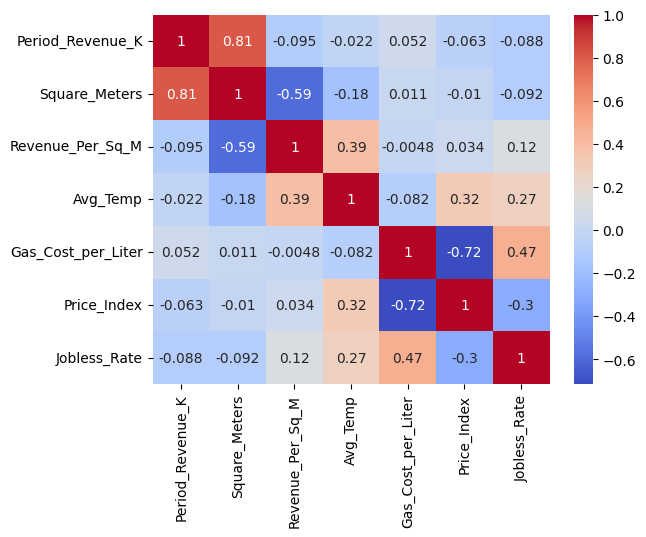

In [ ]:
sns.heatmap(aggregated_data[numeric_features].corr(),annot=True,cmap='coolwarm')

In [ ]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aggregated_data[numeric_features])

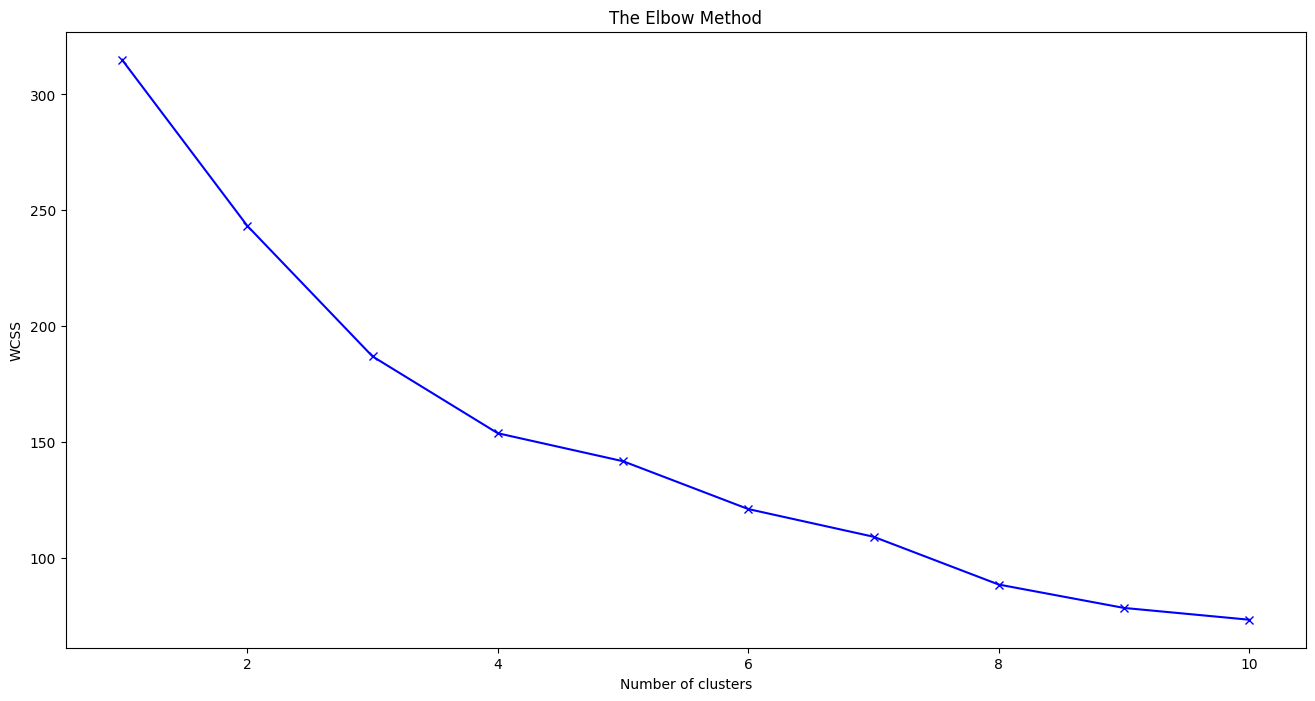

In [ ]:
# importing the matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(scaled_features)

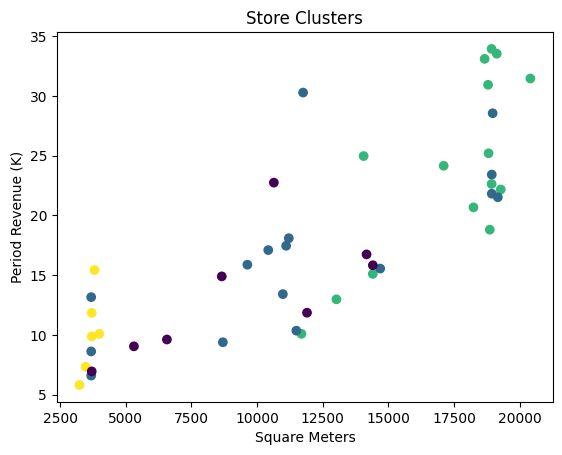

In [ ]:
# Visualize clusters
plt.scatter(aggregated_data['Square_Meters'], aggregated_data['Period_Revenue_K'], c=aggregated_data['Cluster'], cmap='viridis')
plt.xlabel('Square Meters')
plt.ylabel('Period Revenue (K)')
plt.title('Store Clusters')
plt.show()

Here we can see the performance as cluster wise i.e. Efficiency

In [ ]:
aggregated_data.head()

,Outlet_ID,Period_Revenue_K,Square_Meters,Category,Avg_Temp,Gas_Cost_per_Liter,Price_Index,Jobless_Rate,Revenue_Per_Sq_M,Cluster
0,1001,24.967132,14058.0,Premium,20.123438,0.850115,237.595353,9.133267,0.001776,2
1,1002,30.932752,18795.0,Premium,20.059289,0.850402,237.217303,9.148620,0.001646,2
2,1003,7.328966,3474.0,Standard,21.829548,0.850190,241.343354,8.611770,0.002110,3
3,1004,33.535396,19125.0,Premium,16.765158,0.849520,141.548068,7.159363,0.001753,2
4,1005,5.811393,3240.0,Standard,20.668463,0.850671,238.233914,7.555633,0.001794,3


let's suppose we are not using the elbow curve then will be going for Silhoute Score

In [ ]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_features)

  # Get the labels (cluster assignments)
  labels = kmeans.labels_

  # Compute the silhouette score
  score = silhouette_score(scaled_features,labels)
  sil_score.append(score)

In [ ]:
aggregated_data.groupby('Cluster')['Revenue_Per_Sq_M'].mean()

,Revenue_Per_Sq_M
Cluster,
0,0.001522
1,0.001626
2,0.001361
3,0.002721


In [ ]:
aggregated_data['Outlet_ID'][aggregated_data['Cluster']==3]

,Outlet_ID
2,1003
4,1005
29,1030
35,1036
36,1037
42,1043


In [ ]:
aggregated_data['Outlet_ID'][aggregated_data['Cluster']==0]

,Outlet_ID
6,1007
15,1016
16,1017
22,1023
24,1025
25,1026
39,1040
43,1044


In [ ]:
aggregated_data['Outlet_ID'][aggregated_data['Cluster']==1]

,Outlet_ID
9,1010
11,1012
14,1015
17,1018
18,1019
21,1022
23,1024
26,1027
27,1028
28,1029


In [ ]:
aggregated_data['Outlet_ID'][aggregated_data['Cluster']==2]

,Outlet_ID
0,1001
1,1002
3,1004
5,1006
7,1008
8,1009
10,1011
12,1013
13,1014
19,1020


In [ ]:
sil_score

[0.2274451507028069,
 0.252730085798593,
 0.2611203807163008,
 0.23137326236089414,
 0.2538012889689988,
 0.2438857098184157,
 0.2592300126466791,
 0.26398573523651947]

here ideal cluster would be 4